In [3]:
# CNN
import tensorflow as tf

In [4]:
# Modified National Institute of Standards and Technology database
# It has a collection of greyscall images with handwritten digits from 0 to 9
mnist = tf.keras.datasets.mnist

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# x_train, x_test = x_train/255.0, x_test/255.0
# 1) Why to divide by 255?
# When we are working with image data, the pixel values are integers in the range of [0,255].
# So, dividing it by 255. 0 scales these values to the range of [0,1].
# Working with the smaller values increase the stability of optimization algorithm.

# tf.keras.layers.Dense(128, activation='relu')
# 2) Why 128?
# It is the specific number of neurons or units in the dense layer.
# relu --> Rectified Linear Unit, It helps to add non-linearity to our algorithm.

In [9]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2988 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1453 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1078 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0760 - accuracy: 0.9758


In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9783
0.07099742442369461
0.9782999753952026


In [11]:
# Activation function
# Relu
# It is one of the most widely used activation function.
# It replaces all the negative values to 0, leaving the positive value unchanged.

# Sigmoid
# Sigmoid reduces the output between 0 to 1, making it suitable for binary classification problems.

# Tanh(Hyperbolic Tangent)
# It reduces the output between -1 to 1

# Softmax
# It is mostly used in output layer.

# Leaku Relu
# It is a another variant of relu that allows a small positive gradient for negative value just to avoid dead neurons.

In [12]:
# Project-1
# Convert image to grayscall using CNN

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Load the RGB image
image_path = "/content/download.jpeg"
original_image = load_img(image_path, target_size=(224,224))
original_array = img_to_array(original_image)
original_array = original_array/255.0
original_array

array([[[0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        ...,
        [0.99215686, 0.99607843, 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        [0.99607843, 1.        , 1.        ]],

       [[0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        ...,
        [0.99215686, 0.99607843, 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        [0.99607843, 1.        , 1.        ]],

       [[0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        [0.99215686, 1.        , 0.99607843],
        ...,
        [0.99215686, 0.99607843, 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        [0.99607843, 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

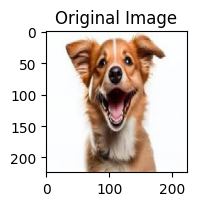

In [15]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 99ms/step


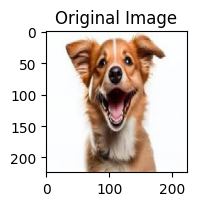

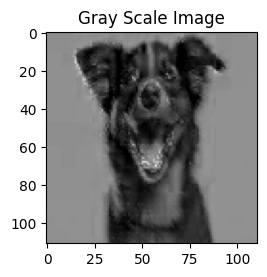

In [16]:
# Convert image to grayscall
model = models.Sequential()

# Sequentials() --> It allow us to create an linear stack of layers in a neural network.
# You can add one layer of neural network at a time and each layer has connection only to the previous and next layer.
model.add(layers.Conv2D(1, (3,3), activation='relu', input_shape=(224,224,3)))

# Conv2D --> It represents 2D conventional layer.
# Conventional layer --> It is used to perform element wise multiplication or addition or division..

# layers.conv2D(1) --> 1 is used to mention the number of filters in the conventional layer
# (3,3) --> set the size of the filter
# (224,224,3) --> 224x224 --> pixels with 3 color channels(RGB)

model.add(layers.MaxPooling2D(2,2))
# MaxPooling2D() --> It is used to set the dimentions of input data and extract important data from conventional 2D layer.

model.summary()

# To reshape the image
input_image = np.expand_dims(original_array, axis=0)
greyscale = model.predict(input_image)

plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title("Gray Scale Image")
plt.imshow(np.squeeze(greyscale), cmap="gray")

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
# Project-2
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [25]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISEY_DIR = "/content/drive/MyDrive/archive (4)-20240219T091541Z-001/archive (4)/train/daisy"
FLOWER_SUNFLOWER_DIR = "/content/drive/MyDrive/archive (4)-20240219T091541Z-001/archive (4)/train/sunflower"
FLOWER_TULIP_DIR = "/content/drive/MyDrive/archive (4)-20240219T091541Z-001/archive (4)/train/tulip"
FLOWER_DANDI_DIR = "/content/drive/MyDrive/archive (4)-20240219T091541Z-001/archive (4)/train/dandelion"
FLOWER_ROSE_DIR = "/content/drive/MyDrive/archive (4)-20240219T091541Z-001/archive (4)/train/rose"

In [26]:
def assign_label(img, flower_type):
	return flower_type

In [27]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
	for img in tqdm(os.listdir(DIR)):
		label = assign_label(img, flower_type)
		path = os.path.join(DIR, img)
		img = cv2.imread(path, cv2.IMREAD_COLOR)
		img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

		X.append(np.array(img))
		Z.append(str(label))

In [28]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:13<00:00, 36.06it/s] 

501


In [29]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:12<00:00, 41.19it/s]

996


In [30]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 557/557 [00:14<00:00, 39.33it/s]

1553


In [31]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:16<00:00, 38.32it/s]

2199


In [32]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:11<00:00, 43.02it/s]

2696


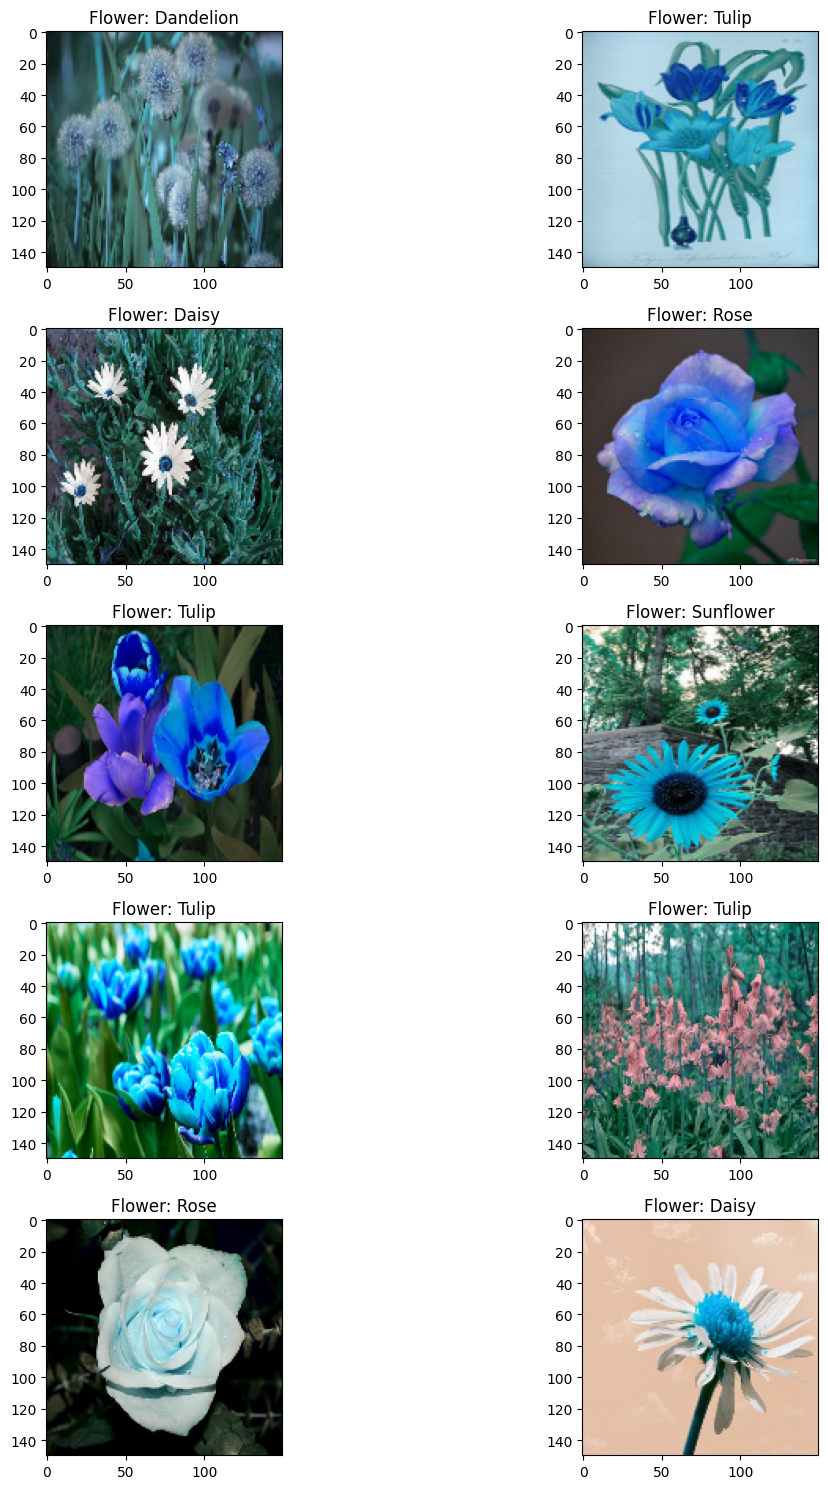

In [33]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
	for col in range(2):
		l=rn.randint(0, len(Z))
		ax[row,col].imshow(X[l])
		ax[row,col].set_title("Flower: "+Z[l])
	plt.tight_layout()